<a href="https://colab.research.google.com/github/kimj98/Etherueum-Fraud-Detection/blob/main/Ethereum_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
from google.colab import files
myfile = files.upload()


Saving transaction_dataset.csv to transaction_dataset.csv


In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [4]:
transaction = pd.read_csv("transaction_dataset.csv")
transaction = transaction.iloc[:,2:]
transaction

,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,...,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,0,844.26,1093.71,704785.63,721,89,0,40,118,...,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0,Cofoundit,Numeraire
1,0x0002b44ddb1476db43c868bd494422ee4c136fed,0,12709.07,2958.44,1218216.73,94,8,0,5,14,...,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0,Livepeer Token,Livepeer Token
2,0x0002bda54cb772d040f779e88eb453cac0daa244,0,246194.54,2434.02,516729.30,2,10,0,10,2,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0,None,XENON
3,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,0,10219.60,15785.09,397555.90,25,9,0,7,13,...,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0,Raiden,XENON
4,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,0,36.61,10707.77,382472.42,4598,20,1,7,19,...,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0,StatusNetwork,EOS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9836,0xff481ca14e6c16b79fc8ab299b4d2387ec8ecdd2,1,12635.10,631.39,58748.48,4,13,0,11,4,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,2.0,,GSENetwork
9837,0xff718805bb9199ebf024ab6acd333e603ad77c85,1,0.00,0.00,0.00,0,0,0,0,0,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,1.0,,Blockwell say NOTSAFU
9838,0xff8e6af02d41a576a0c82f7835535193e1a6bccc,1,2499.44,2189.29,261601.88,67,43,0,31,44,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,5.0,,Free BOB Tokens - BobsRepair.com
9839,0xffde23396d57e10abf58bd929bb1e856c7718218,1,0.00,0.00,0.00,0,1,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
pd.pandas.set_option('display.max_columns', None)

#Data Preprocessing

In [6]:
numerical_features = transaction.dtypes[transaction.dtypes != 'object'].index
numerical_features = numerical_features[numerical_features != 'FLAG']
categorical_features =  transaction.dtypes[transaction.dtypes == 'object'].index


In [7]:
#Understand general statistics of the numerical features
numerical_transction = transaction.loc[:,transaction.columns.isin(numerical_features)]
numerical_transction.describe()

,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,max value received,avg val received,min val sent,max val sent,avg val sent,min value sent to contract,max val sent to contract,avg value sent to contract,total transactions (including tnx to create contract,total Ether sent,total ether received,total ether sent contracts,total ether balance,Total ERC20 tnxs,ERC20 total Ether received,ERC20 total ether sent,ERC20 total Ether sent contract,ERC20 uniq sent addr,ERC20 uniq rec addr,ERC20 uniq sent addr.1,ERC20 uniq rec contract addr,ERC20 avg time between sent tnx,ERC20 avg time between rec tnx,ERC20 avg time between rec 2 tnx,ERC20 avg time between contract tnx,ERC20 min val rec,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name
count,9841.000000,9841.000000,9.841000e+03,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9.841000e+03,9.841000e+03,9841.000000,9.841000e+03,9012.000000,9.012000e+03,9.012000e+03,9012.000000,9012.000000,9012.000000,9012.000000,9012.000000,9012.0,9012.0,9012.0,9012.0,9012.000000,9.012000e+03,9.012000e+03,9.012000e+03,9.012000e+03,9.012000e+03,9012.0,9012.0,9012.0,9012.000000,9012.000000
mean,5086.878721,8004.851184,2.183333e+05,115.931714,163.700945,3.729702,30.360939,25.840159,43.845153,523.152481,100.711721,4.800090,314.617297,44.755731,0.000003,0.000008,0.000005,283.362362,1.016092e+04,1.163832e+04,0.000008,1.477395e+03,36.255659,1.296207e+08,1.386849e+07,110.939207,5.638038,7.598535,0.003440,4.901909,0.0,0.0,0.0,0.0,485.614688,1.252524e+08,4.346203e+06,1.174126e+04,1.303594e+07,6.318389e+06,0.0,0.0,0.0,1.384931,4.826676
std,21486.549974,23081.714801,3.229379e+05,757.226361,940.836550,141.445583,298.621112,263.820410,325.929139,13008.821539,2885.002236,138.609682,6629.212643,239.080215,0.000225,0.000516,0.000323,1352.404013,3.583227e+05,3.642048e+05,0.000516,2.424254e+05,447.528908,1.053858e+10,1.180390e+09,6128.634953,105.252500,81.818470,0.065698,17.246576,0.0,0.0,0.0,0.0,16883.278712,1.053741e+10,2.141192e+08,1.053567e+06,1.179905e+09,5.914764e+08,0.0,0.0,0.0,6.735121,16.678607
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,-1.560535e+07,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000
25%,0.000000,0.000000,3.169300e+02,1.000000,1.000000,0.000000,1.000000,1.000000,0.001000,1.000000,0.426905,0.000000,0.164577,0.086184,0.000000,0.000000,0.000000,4.000000,2.262059e-01,2.670424e+00,0.000000,6.214900e-04,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000
50%,17.340000,509.770000,4.663703e+04,3.000000,4.000000,0.000000,2.000000,2.000000,0.095856,6.000000,1.729730,0.049126,4.999380,1.606000,0.000000,0.000000,0.000000,8.000000,1.248680e+01,3.052963e+01,0.000000,1.722000e-03,1.000000,1.000000e-12,0.000000e+00,0.000000,0.000000,1.000000,0.000000,1.000000,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,1.000000
75%,565.470000,5480.390000,3.040710e+05,11.000000,27.000000,0.000000,5.000000,3.000000,2.000000,67.067040,22.000000,0.998800,61.520653,21.999380,0.000000,0.000000,0.000000,54.000000,1.009990e+02,1.010000e+02,0.000000,4.45

In [8]:
transaction.loc[:,transaction.columns.isin(categorical_features)].describe()

,Address,ERC20 most sent token type,ERC20_most_rec_token_type
count,9841,9000,8990
unique,9816,305,467
top,0x4cd526aa2db72eb1fd557b37c6b0394acd35b212,0,0
freq,2,4399,4399


## Missing Values / Low Variance 

In [9]:
transaction.isnull().sum()

Address                                                   0
FLAG                                                      0
Avg min between sent tnx                                  0
Avg min between received tnx                              0
Time Diff between first and last (Mins)                   0
Sent tnx                                                  0
Received Tnx                                              0
Number of Created Contracts                               0
Unique Received From Addresses                            0
Unique Sent To Addresses                                  0
min value received                                        0
max value received                                        0
avg val received                                          0
min val sent                                              0
max val sent                                              0
avg val sent                                              0
min value sent to contract              

In [10]:
transaction.var()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


FLAG                                                    1.724110e-01
Avg min between sent tnx                                4.616718e+08
Avg min between received tnx                            5.327656e+08
Time Diff between first and last (Mins)                 1.042889e+11
Sent tnx                                                5.733918e+05
Received Tnx                                            8.851734e+05
Number of Created Contracts                             2.000685e+04
Unique Received From Addresses                          8.917457e+04
Unique Sent To Addresses                                6.960121e+04
min value received                                      1.062298e+05
max value received                                      1.692294e+08
avg val received                                        8.323238e+06
min val sent                                            1.921264e+04
max val sent                                            4.394646e+07
avg val sent                      

Since most of the null values are from numerical values that are related to ERC20 token transactions, I can assume that those values do not exists which can be filled with 0 

In [11]:
transaction.fillna(0 , inplace = True)
no_data = transaction.var()[transaction.var() == 0].index
list(no_data)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


[' ERC20 avg time between sent tnx',
 ' ERC20 avg time between rec tnx',
 ' ERC20 avg time between rec 2 tnx',
 ' ERC20 avg time between contract tnx',
 ' ERC20 min val sent contract',
 ' ERC20 max val sent contract',
 ' ERC20 avg val sent contract']

In [12]:
transaction = transaction.loc[:,~transaction.columns.isin(no_data)]
transaction

,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,max value received,avg val received,min val sent,max val sent,avg val sent,min value sent to contract,max val sent to contract,avg value sent to contract,total transactions (including tnx to create contract,total Ether sent,total ether received,total ether sent contracts,total ether balance,Total ERC20 tnxs,ERC20 total Ether received,ERC20 total ether sent,ERC20 total Ether sent contract,ERC20 uniq sent addr,ERC20 uniq rec addr,ERC20 uniq sent addr.1,ERC20 uniq rec contract addr,ERC20 min val rec,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,0,844.26,1093.71,704785.63,721,89,0,40,118,0.000000,45.806785,6.589513,0.000000,31.220000,1.200681,0.0,0.0,0.0,810,865.691093,586.466675,0.0,-279.224419,265.0,3.558854e+07,3.560317e+07,0.0,30.0,54.0,0.0,58.0,0.00,1.500000e+07,265586.147600,0.000000,1.683100e+07,271779.920000,39.0,57.0,Cofoundit,Numeraire
1,0x0002b44ddb1476db43c868bd494422ee4c136fed,0,12709.07,2958.44,1218216.73,94,8,0,5,14,0.000000,2.613269,0.385685,0.000000,1.800000,0.032844,0.0,0.0,0.0,102,3.087297,3.085478,0.0,-0.001819,8.0,4.034283e+02,2.260809e+00,0.0,1.0,5.0,0.0,7.0,0.00,3.650000e+02,57.632615,2.260809,2.260809e+00,2.260809,1.0,7.0,Livepeer Token,Livepeer Token
2,0x0002bda54cb772d040f779e88eb453cac0daa244,0,246194.54,2434.02,516729.30,2,10,0,10,2,0.113119,1.165453,0.358906,0.050000,3.538616,1.794308,0.0,0.0,0.0,12,3.588616,3.589057,0.0,0.000441,8.0,5.215121e+02,0.000000e+00,0.0,0.0,7.0,0.0,8.0,0.00,4.428198e+02,65.189009,0.000000,0.000000e+00,0.000000,0.0,8.0,None,XENON
3,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,0,10219.60,15785.09,397555.90,25,9,0,7,13,0.000000,500.000000,99.488840,0.000000,450.000000,70.001834,0.0,0.0,0.0,34,1750.045862,895.399559,0.0,-854.646303,14.0,1.711105e+04,1.141223e+04,0.0,2.0,11.0,0.0,11.0,0.00,1.141223e+04,1555.550174,100.000000,9.029231e+03,3804.076893,1.0,11.0,Raiden,XENON
4,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,0,36.61,10707.77,382472.42,4598,20,1,7,19,0.000000,12.802411,2.671095,0.000000,9.000000,0.022688,0.0,0.0,0.0,4619,104.318883,53.421897,0.0,-50.896986,42.0,1.628297e+05,1.235399e+05,0.0,4.0,23.0,0.0,27.0,0.00,9.000000e+04,4934.232147,0.000000,4.500000e+04,13726.659220,6.0,27.0,StatusNetwork,EOS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9836,0xff481ca14e6c16b79fc8ab299b4d2387ec8ecdd2,1,12635.10,631.39,58748.48,4,13,0,11,4,0.004082,12.000000,2.821060,0.465461,12.200000,9.166365,0.0,0.0,0.0,17,36.665461,36.673777,0.0,0.008316,2.0,1.337000e+00,0.000000e+00,0.0,0.0,2.0,0.0,2.0,0.00,1.337000e+00,0.668500,0.000000,0.000000e+00,0.000000,0.0,2.0,,GSENetwork
9837,0xff718805bb9199ebf024ab6acd333e603ad77c85,1,0.00,0.00,0.00,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0,0.000000,0.000000,0.0,0.000000,1.0,1.337000e+01,0.000000e+00,0.0,0.0,1.0,0.0,1.0,13.37,1.337000e+01,13.370000,0.000000,0.000000e+00,0.000000,0.0,1.0,,Blockwell say NOTSAFU
9838,0xff8e6af02d41a576a0c82f7835535193e1a6bccc,1,2499.44,2189.29,261601.88,67,43,0,31,44,0.001078,21.310000,1.234192,0.004000,9.500000,0.922179,0.0,0.0,0.0,110,61.785995,53.070252,0.0,-8.715743,5.0,1.503470e+03,0.000000e+00,0.0,0.0,5.0,0.0,5.0,0.00,1.500000e+03,300.693901,0.000000,0.000000e+00,0.000000,0.0,5.0,,Free BOB Tokens - BobsRepair.com
9839,0xffde23396d57e10abf58bd929bb1e856c7718218,1,0.00,0.00,0.00,0,1,0,1,0,0.500000,0.500000,0.500000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1,0.000000,0.500000,0.0,0.500000,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.00,


##Finding For Abnormal Values

I was able to find out that over 900 of data points had a total ether balance of 0 which seems odd. Howeversince this data came from the difference between total recieved vs total sent, I will going to just remove this feature from the data

In [13]:
transaction[transaction["total ether balance"] < 0]

,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,max value received,avg val received,min val sent,max val sent,avg val sent,min value sent to contract,max val sent to contract,avg value sent to contract,total transactions (including tnx to create contract,total Ether sent,total ether received,total ether sent contracts,total ether balance,Total ERC20 tnxs,ERC20 total Ether received,ERC20 total ether sent,ERC20 total Ether sent contract,ERC20 uniq sent addr,ERC20 uniq rec addr,ERC20 uniq sent addr.1,ERC20 uniq rec contract addr,ERC20 min val rec,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,0,844.26,1093.71,704785.63,721,89,0,40,118,0.000000,45.806785,6.589513,0.000000,31.220000,1.200681,0.0,0.0,0.0,810,865.691093,586.466675,0.0,-279.224419,265.0,3.558854e+07,3.560317e+07,0.0,30.0,54.0,0.0,58.0,0.00,1.500000e+07,265586.147600,0.000000,1.683100e+07,271779.920000,39.0,57.0,Cofoundit,Numeraire
1,0x0002b44ddb1476db43c868bd494422ee4c136fed,0,12709.07,2958.44,1218216.73,94,8,0,5,14,0.000000,2.613269,0.385685,0.000000,1.800000,0.032844,0.0,0.0,0.0,102,3.087297,3.085478,0.0,-0.001819,8.0,4.034283e+02,2.260809e+00,0.0,1.0,5.0,0.0,7.0,0.00,3.650000e+02,57.632615,2.260809,2.260809e+00,2.260809,1.0,7.0,Livepeer Token,Livepeer Token
3,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,0,10219.60,15785.09,397555.90,25,9,0,7,13,0.000000,500.000000,99.488840,0.000000,450.000000,70.001834,0.0,0.0,0.0,34,1750.045862,895.399559,0.0,-854.646303,14.0,1.711105e+04,1.141223e+04,0.0,2.0,11.0,0.0,11.0,0.00,1.141223e+04,1555.550174,100.000000,9.029231e+03,3804.076893,1.0,11.0,Raiden,XENON
4,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,0,36.61,10707.77,382472.42,4598,20,1,7,19,0.000000,12.802411,2.671095,0.000000,9.000000,0.022688,0.0,0.0,0.0,4619,104.318883,53.421897,0.0,-50.896986,42.0,1.628297e+05,1.235399e+05,0.0,4.0,23.0,0.0,27.0,0.00,9.000000e+04,4934.232147,0.000000,4.500000e+04,13726.659220,6.0,27.0,StatusNetwork,EOS
7,0x000e001ab444fa8d6dc4a402f8d7cfc88fe8c64d,0,1497.39,176.84,319828.05,213,5,0,3,3,0.118490,2.000000,0.891098,0.000000,0.700000,0.040861,0.0,0.0,0.0,218,8.703392,4.455490,0.0,-4.247902,7.0,3.979520e+02,0.000000e+00,0.0,0.0,5.0,0.0,7.0,0.00,3.650000e+02,56.850281,0.000000,0.000000e+00,0.000000,0.0,7.0,None,XENON
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9779,0xf902aa3a62f9e28878129e1a8f1eb71e4fd7a88c,1,4198.06,1832.94,194883.00,8,88,0,47,1,0.000200,86.862386,1.995972,0.009557,174.341246,21.960258,0.0,0.0,0.0,96,175.682063,175.645513,0.0,-0.036550,32.0,1.108243e+05,0.000000e+00,0.0,0.0,24.0,0.0,23.0,0.00,1.000000e+05,3463.258072,0.000000,0.000000e+00,0.000000,0.0,21.0,,Amplify
9783,0xf94b8e0ceba6dcd1b888fe02141dd9d0b8e67715,1,1197.55,3017.03,200480.40,49,47,0,42,2,0.003617,6.000000,0.665769,0.000525,5.998950,0.658775,0.0,0.0,0.0,96,32.279997,31.291149,0.0,-0.988849,1.0,1.000000e+02,0.000000e+00,0.0,0.0,1.0,0.0,1.0,100.00,1.000000e+02,100.000000,0.000000,0.000000e+00,0.000000,0.0,1.0,,blockwell.ai KYC Casper Token
9807,0xfb864b083b6284a864cd3a18378e65babd13ce1b,1,0.00,114.43,163584.83,1,3,0,3,1,0.003369,0.990420,0.498810,1.690000,1.690000,1.690000,0.0,0.0,0.0,4,1.690000,1.496430,0.0,-0.193570,1.0,1.337000e+01,0.000000e+00,0.0,0.0,1.0,0.0,1.0,13.37,1.337000e+01,13.370000,0.000000,0.000000e+00,0.000000,0.0,1.0,,Blockwell say NOTSAFU
9826,0xfddbfa1b0b93612b95e3296690b63b74d019370c,1,943.80,198.21,14478.57,4,54,0,35,4,0.000000,1.010432,0.450367,5.177498,7.000000,6.544374,0.0,0.0,0.0,58,26.177498,24.319821,0.0,-1.857677,0.0,0.000000e+00,0.000000e+0

In [14]:
transaction = transaction.loc[:,transaction.columns != "total ether balance"]

#Multicolinearity (Feature correlations)

I will be going to remove features that are correlated with each other because I would like to use a model that I can interpret later so that I can understand which features are important in predicting the fradulant transaction. If I only were to only consider the predicting power of the model, removing features with multicolinearity would not be nessesary.

In [15]:
feature_correlations = transaction.loc[:,transaction.columns.isin(numerical_features)].corr()
feature_correlations


upper = np.triu(np.ones(feature_correlations.shape)).astype(np.bool) 
melted_correlation =feature_correlations.where(upper).stack().reset_index()
melted_correlation = melted_correlation.loc[melted_correlation["level_0"]!=melted_correlation["level_1"], :]
#Finding Features that shows greater correlation in relative to other features
melted_correlation

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


,level_0,level_1,0
1,Avg min between sent tnx,Avg min between received tnx,0.060979
2,Avg min between sent tnx,Time Diff between first and last (Mins),0.214722
3,Avg min between sent tnx,Sent tnx,-0.032289
4,Avg min between sent tnx,Received Tnx,-0.035735
5,Avg min between sent tnx,Number of Created Contracts,-0.006186
...,...,...,...
695,ERC20 max val sent,ERC20 uniq sent token name,0.001276
696,ERC20 max val sent,ERC20 uniq rec token name,-0.000568
698,ERC20 avg val sent,ERC20 uniq sent token name,-0.000332
699,ERC20 avg val sent,ERC20 uniq rec token name,-0.001850


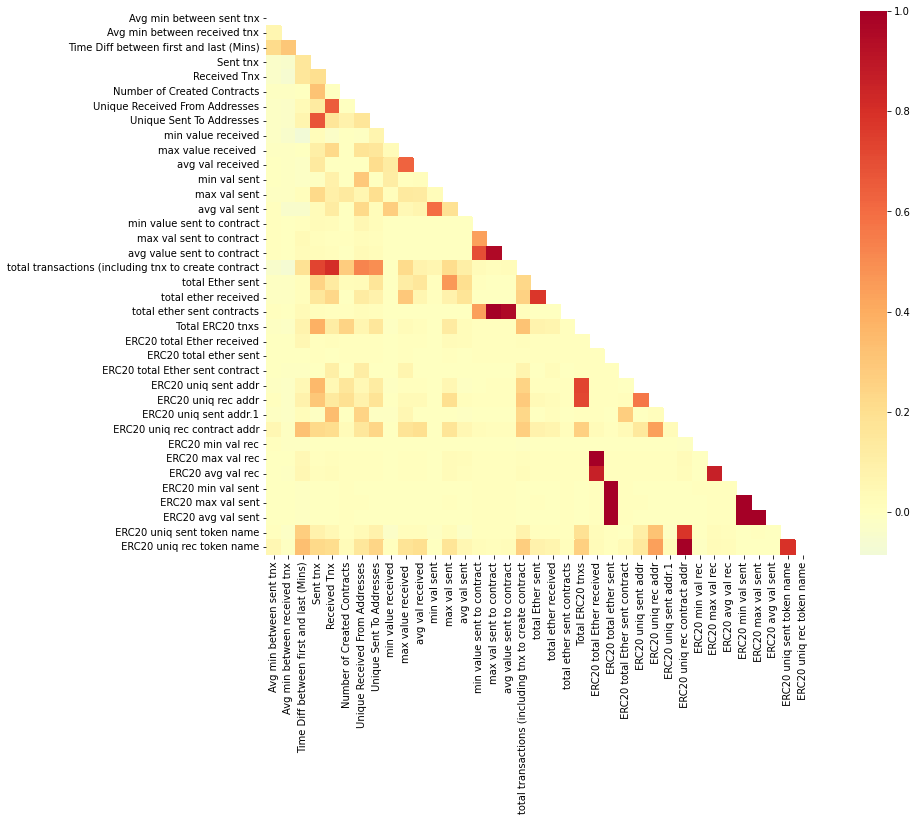

In [16]:
corr = transaction.loc[:,transaction.columns.isin(numerical_features)].corr()


def corr_graph(data):
  data = transaction.loc[:,transaction.columns.isin(numerical_features)].corr()

  mask = np.zeros_like(data)
  mask[np.triu_indices_from(mask)]=True
  fig, ax = plt.subplots(figsize=(18,10))
  sns.heatmap(data,  mask=mask, annot=False, cmap='RdYlBu_r', center=0, linewidths=0., square=True)

corr_graph(corr)

In [17]:
numerical_features = numerical_features.drop([' ERC20 max val sent',' ERC20 min val sent',' ERC20 total ether sent','total transactions (including tnx to create contract','total ether sent contracts'])

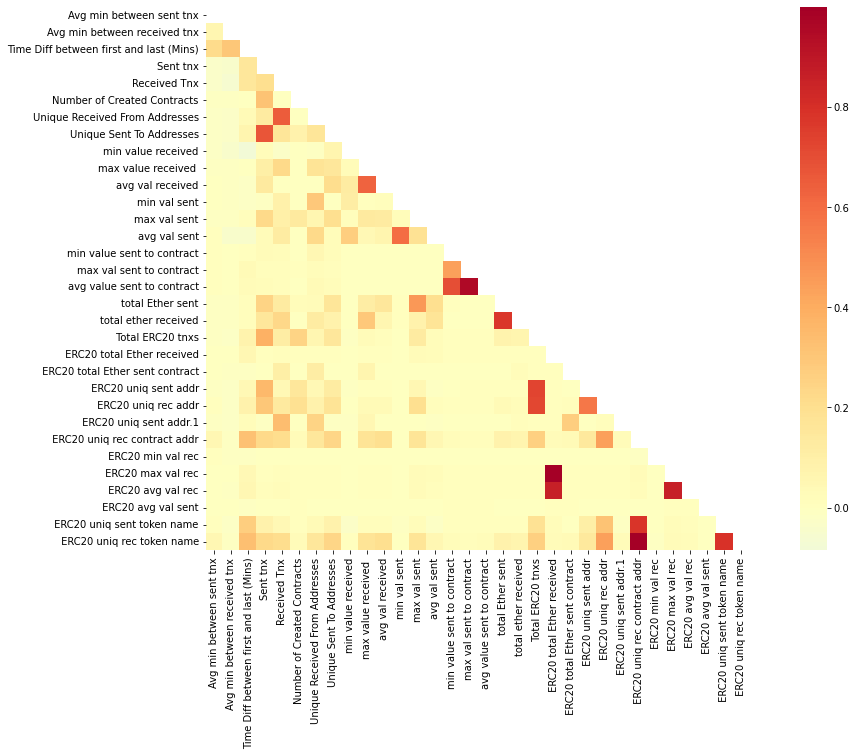

In [18]:
corr = transaction.loc[:,transaction.columns.isin(numerical_features)].corr()

corr_graph(corr)

In [19]:
numerical_features = numerical_features.drop([' ERC20 uniq rec token name', ' ERC20 uniq rec contract addr'])

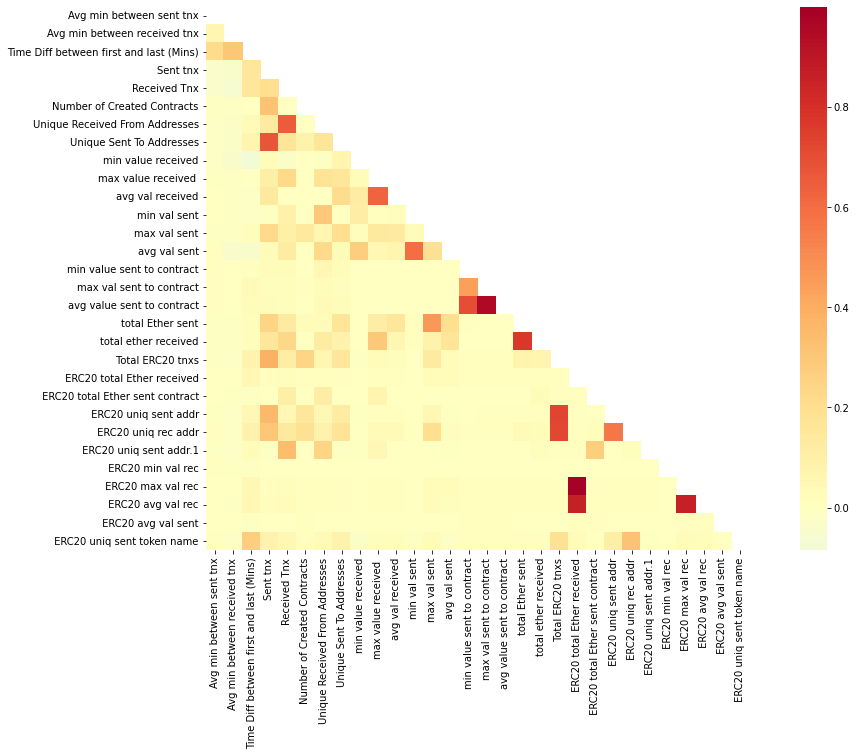

In [20]:
corr = transaction.loc[:,transaction.columns.isin(numerical_features)].corr()
corr_graph(corr)

In [21]:
numerical_features = numerical_features.drop([' ERC20 avg val rec', ' ERC20 max val rec','max val sent to contract','min value sent to contract'])

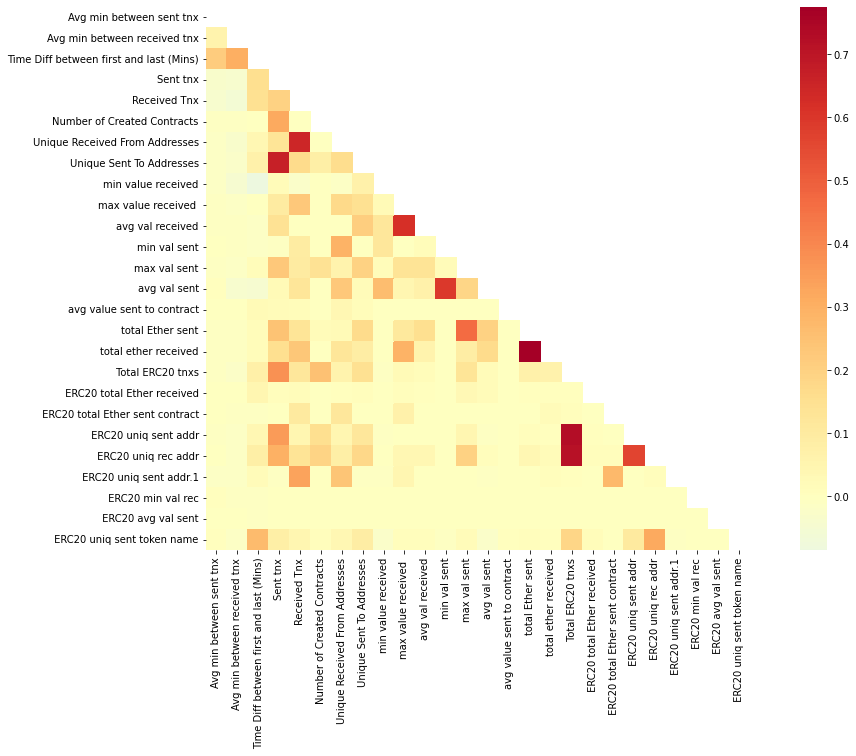

In [22]:
corr = transaction.loc[:,transaction.columns.isin(numerical_features)].corr()
corr_graph(corr)

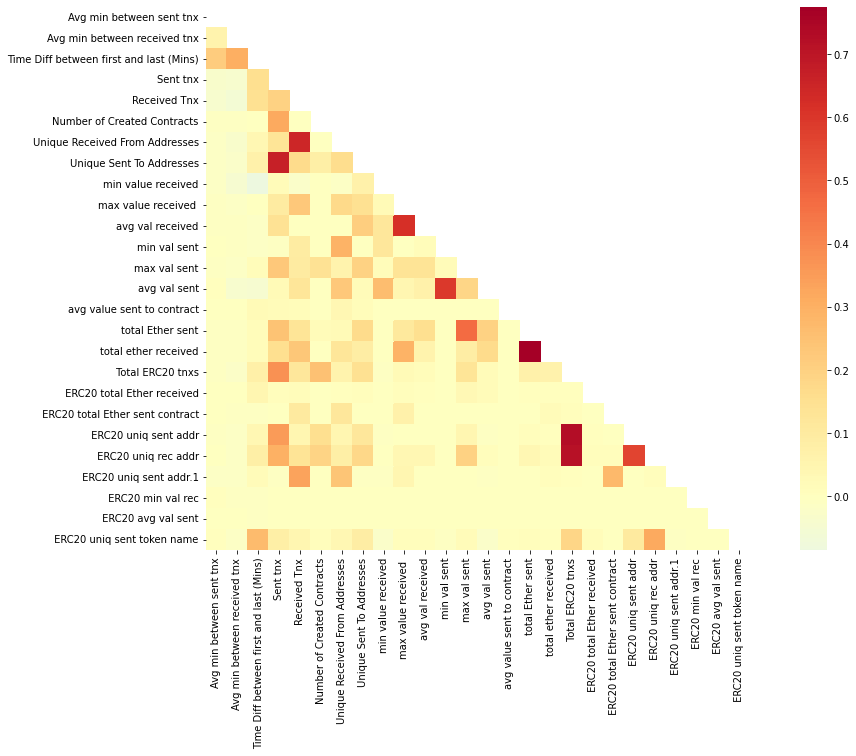

In [23]:
corr = transaction.loc[:,transaction.columns.isin(numerical_features)].corr()
corr_graph(corr)

In [24]:
FLAG = transaction["FLAG"]
numerical_transaction = transaction.loc[:, transaction.columns.isin(numerical_features)]
transaction = pd.concat([numerical_transaction,FLAG], axis = 1)

In [25]:
data = {}
for i in numerical_transaction.columns:
  values = numerical_transaction[i].value_counts()
  zero_percentage = values[values.index == 0]/len(numerical_transaction)*100
  zero_percentage = zero_percentage[0]
  data[i] = zero_percentage
pd.Series(data)

Avg min between sent tnx                   35.789046
Avg min between received tnx               28.747079
Time Diff between first and last (Mins)     6.411950
Sent tnx                                   20.475561
Received Tnx                                5.599024
Number of Created Contracts                86.220913
Unique Received From Addresses              5.599024
Unique Sent To Addresses                   20.475561
min value received                         21.034448
max value received                          7.184229
avg val received                            7.204552
min val sent                               36.022762
max val sent                               21.003963
avg val sent                               21.003963
avg value sent to contract                 99.969515
total Ether sent                           21.003963
total ether received                        7.184229
 Total ERC20 tnxs                          53.124682
 ERC20 total Ether received                53.

##Modeling

In [26]:
X, Y = transaction.loc[:,~transaction.columns.isin(["FLAG"])],transaction["FLAG"]


In [48]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 42)


In [85]:
def fit_predict(model,trainX, trainY, testX):
  model.fit(trainX, trainY)
  prediction = model.predict(testX)
  return prediction 

def evaluate(prediction, testY):
  accuracy = np.mean(testY == prediction)
  f1 = f1_score(testY, prediction)
  recall = recall_score(testY, prediction)
  precision = precision_score(testY, prediction)

  cm = confusion_matrix(testY,prediction)
  sns.heatmap(cm,annot=True, cmap='Blues',fmt='d')
  print("Accuracy: {}, F1 Score {}, Precision {},Recall {}".format(accuracy,f1,precision,recall))


In [86]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=0)
X_train_over,Y_train_over = smote.fit_resample(X_train,Y_train)

Baseline Model 

In [87]:
Y.value_counts()

0    7662
1    2179
Name: FLAG, dtype: int64

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.7798848628513376, F1 Score 0.0, Precision 0.0,Recall 0.0


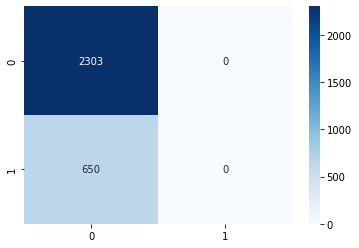

In [88]:
prediction = np.zeros(len(Y_test))
evaluate(prediction,Y_test)


Logistic Regression

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.7798848628513376, F1 Score 0.0, Precision 0.0,Recall 0.0


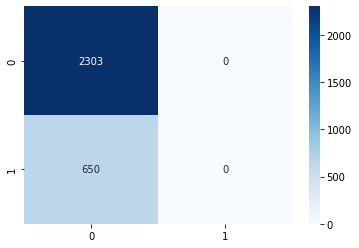

In [89]:
logit = LogisticRegression()
prediction =fit_predict(logit,X_train, Y_train,X_test)
evaluate(prediction, Y_test)


Accuracy: 0.8042668472739587, F1 Score 0.20385674931129477, Precision 0.9736842105263158,Recall 0.11384615384615385
With Oversampling


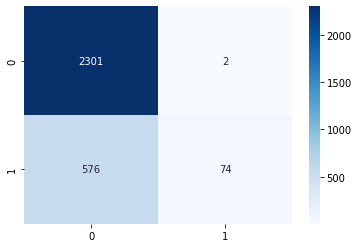

In [90]:
prediction =fit_predict(logit,X_train_over,Y_train_over,X_test)
evaluate(prediction, Y_test)
print("With Oversampling")

Decision Tree


Accuracy: 0.9282086014222825, F1 Score 0.8389057750759878, Precision 0.8288288288288288,Recall 0.8492307692307692


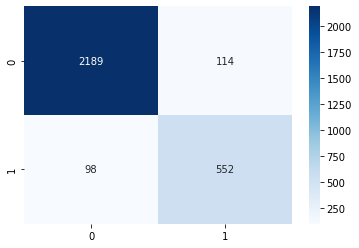

In [91]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
prediction = fit_predict(clf,X_train, Y_train,X_test)
evaluate(prediction, Y_test)

Accuracy: 0.9258381307145276, F1 Score 0.8393250183418929, Precision 0.8022440392706872,Recall 0.88


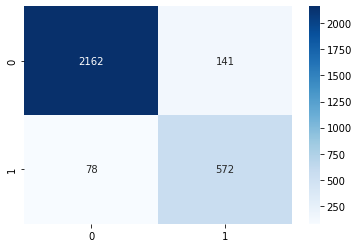

In [92]:
prediction =fit_predict(clf,X_train_over,Y_train_over,X_test)
evaluate(prediction, Y_test)

RandomForest

Accuracy: 0.9525905858449035, F1 Score 0.8854337152209494, Precision 0.9458041958041958,Recall 0.8323076923076923


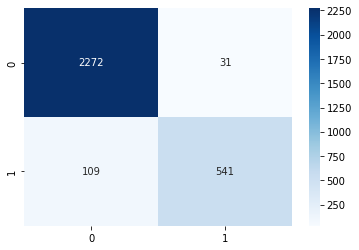

In [93]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
prediction = fit_predict(clf,X_train, Y_train,X_test)
evaluate(prediction, Y_test)

Accuracy: 0.9566542499153403, F1 Score 0.9001560062402495, Precision 0.9129746835443038,Recall 0.8876923076923077


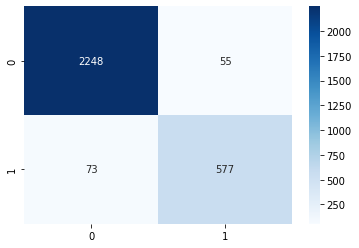

In [94]:
prediction =fit_predict(clf,X_train_over,Y_train_over,X_test)
evaluate(prediction, Y_test)

AdaBoost

Accuracy: 0.9434473416864206, F1 Score 0.8662930344275421, Precision 0.9031719532554258,Recall 0.8323076923076923


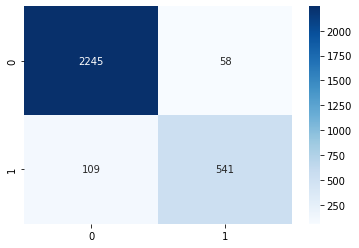

In [95]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier()
prediction = fit_predict(clf,X_train, Y_train,X_test)
evaluate(prediction, Y_test)


Accuracy: 0.9376904842533017, F1 Score 0.8614457831325301, Precision 0.8436578171091446,Recall 0.88


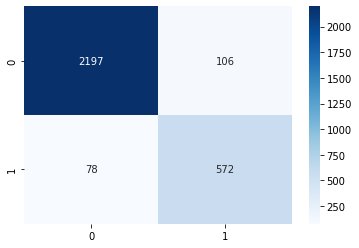

In [96]:
prediction =fit_predict(clf,X_train_over,Y_train_over,X_test)
evaluate(prediction, Y_test)

LightBGM

Accuracy: 0.9624111073484592, F1 Score 0.9122529644268774, Precision 0.9382113821138212,Recall 0.8876923076923077


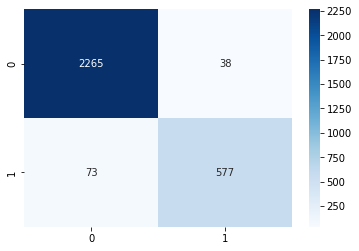

In [97]:
from lightgbm import LGBMClassifier
lgb = LGBMClassifier()
prediction =fit_predict(lgb,X_train, Y_train,X_test)
evaluate(prediction, Y_test)


Accuracy: 0.9590247206230952, F1 Score 0.9077040427154843, Precision 0.9001512859304085,Recall 0.9153846153846154


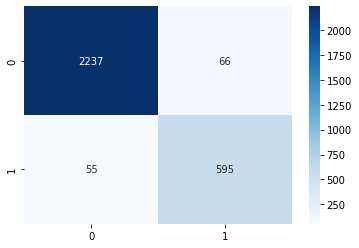

In [98]:
prediction =fit_predict(lgb,X_train_over,Y_train_over,X_test)
evaluate(prediction, Y_test)

XGBoost 

Accuracy: 0.9508973924822215, F1 Score 0.8796680497925311, Precision 0.954954954954955,Recall 0.8153846153846154


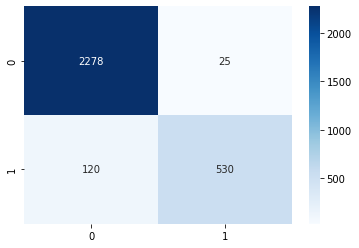

In [99]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
prediction =fit_predict(xgb,X_train, Y_train,X_test)
evaluate(prediction, Y_test)

Accuracy: 0.9478496444293938, F1 Score 0.8847305389221557, Precision 0.8615160349854227,Recall 0.9092307692307692


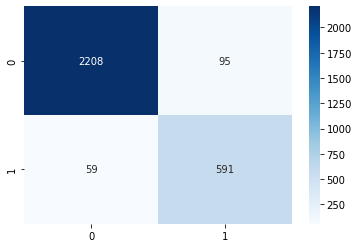

In [100]:
prediction =fit_predict(xgb,X_train_over,Y_train_over,X_test)
evaluate(prediction, Y_test)

Using Oversampling does not nessesarily increase the F1 Score as expected. Instead it reduces precision and increases recall as a tradeoff. If we put more cost in recall, then oversampling using SMOTE might be a choice

Using all different classifier in naive form, LightBGM model should the best result giving highest accuracy and f1 score

In [101]:
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
from sklearn.model_selection import RandomizedSearchCV
lgb = LGBMClassifier(n_estimator= 5000, random_state = 200)
param ={'num_leaves': sp_randint(6, 50), 
             'min_child_samples': sp_randint(100, 500), 
             'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
             'subsample': sp_uniform(loc=0.2, scale=0.8), 
             'colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
             'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
             'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100]}

In [102]:
model= RandomizedSearchCV(
    lgb,
    param_distributions=param, 
    n_iter = 100,  
    cv = 5,        
    scoring='f1',  
    verbose=1,  
    random_state = 200
  )

model.fit(X_train, Y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5,
                   estimator=LGBMClassifier(n_estimator=5000, random_state=200),
                   n_iter=100,
                   param_distributions={'colsample_bytree': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f3949a00710>,
                                        'min_child_samples': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f3949953090>,
                                        'min_child_weight': [1e-05, 0.001, 0.01,
                                                             0.1, 1, 10.0,
                                                             100.0, 1000.0,
                                                             10000.0],
                                        'num_leaves': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f3949a01c10>,
                                        'reg_alpha': [0, 0.1, 1, 2, 5, 7, 10,
                                                      50, 100],
                           

In [103]:
model.best_score_ , model.best_params_

(0.9152258270150673,
 {'colsample_bytree': 0.7216387636585915,
  'min_child_samples': 104,
  'min_child_weight': 0.1,
  'num_leaves': 38,
  'reg_alpha': 0.1,
  'reg_lambda': 1,
  'subsample': 0.21793376307743684})

Accuracy: 0.9583474432780223, F1 Score 0.903225806451613, Precision 0.9243156199677939,Recall 0.8830769230769231


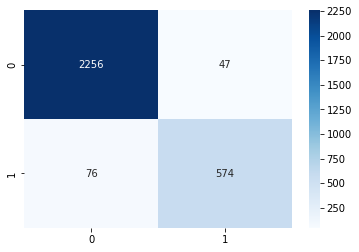

In [104]:
prediction = model.predict(X_test)
evaluate(prediction, Y_test)
